In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
# Check for Missing Values
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

Series([], dtype: float64)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [6]:
# Dropping Id column
df = df.drop('Id', axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Species', axis=1)
Y = df[['Species']]

In [8]:
#Check the dataset
print(Y)
print(X)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
6       Iris-setosa
7       Iris-setosa
8       Iris-setosa
9       Iris-setosa
10      Iris-setosa
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15      Iris-setosa
16      Iris-setosa
17      Iris-setosa
18      Iris-setosa
19      Iris-setosa
20      Iris-setosa
21      Iris-setosa
22      Iris-setosa
23      Iris-setosa
24      Iris-setosa
25      Iris-setosa
26      Iris-setosa
27      Iris-setosa
28      Iris-setosa
29      Iris-setosa
..              ...
120  Iris-virginica
121  Iris-virginica
122  Iris-virginica
123  Iris-virginica
124  Iris-virginica
125  Iris-virginica
126  Iris-virginica
127  Iris-virginica
128  Iris-virginica
129  Iris-virginica
130  Iris-virginica
131  Iris-virginica
132  Iris-virginica
133  Iris-virginica
134  Iris-virginica
135  Iris-virginica
136  Iris-virginica
137  Iris-virginica


### Find the distribution of target variable (Class) (1 Marks)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Species'] = labelencoder.fit_transform(df.Species)

In [11]:
def plot_skewness(column):
        skewed_data = pd.DataFrame(df[column])

        skewed_data.plot(kind="density",
                      figsize=(10,10),
                        xlim=(0,5))


        plt.vlines(skewed_data.mean(),     
                   ymin=0, 
                   ymax=1.4,
                   linewidth=5.0,
                   label = 'mean',
                   linestyles = 'dashdot',
                   color = 'blue'
                  )

        plt.vlines(skewed_data.median(),   
                   ymin=0, 
                   ymax=1.4, 
                   linewidth=2.0,
                   label = 'median',
                   color='red')

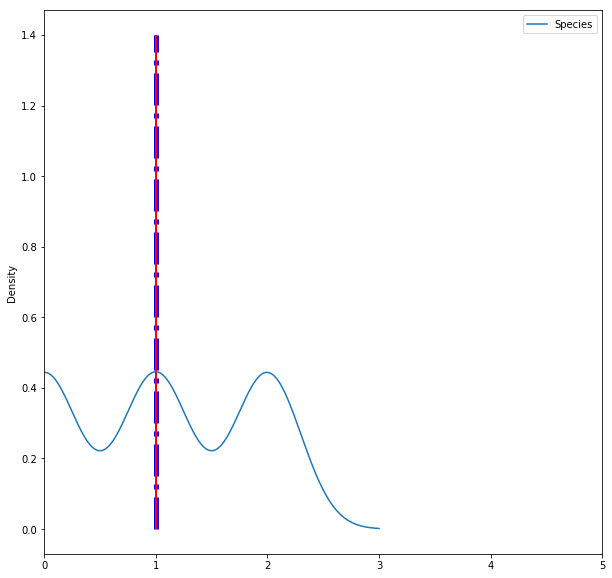

In [12]:
plot_skewness('Species')

### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa7a6e94c>]],
      dtype=object)

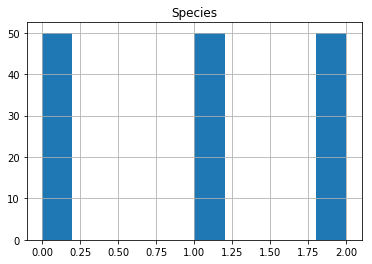

In [13]:
df.hist(column='Species')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

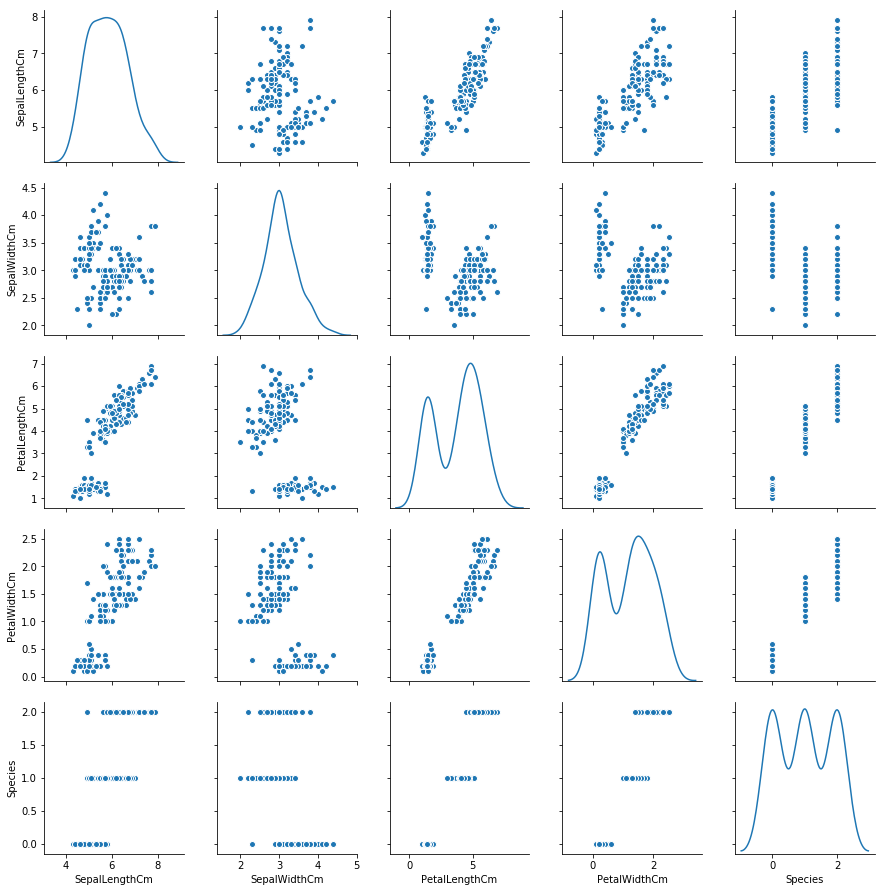

In [15]:
sns.pairplot(df , diag_kind='kde')

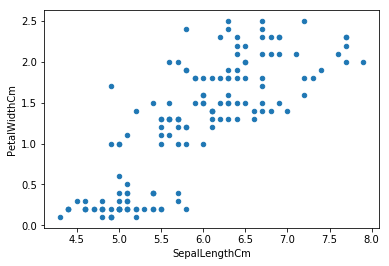

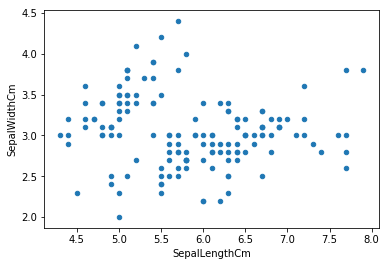

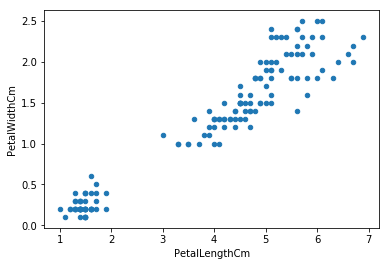

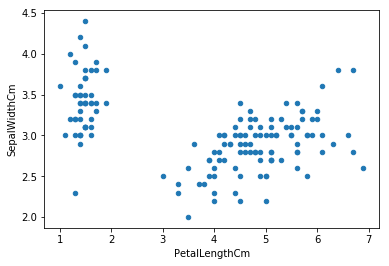

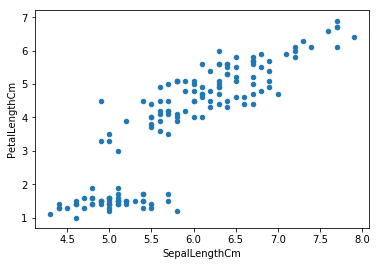

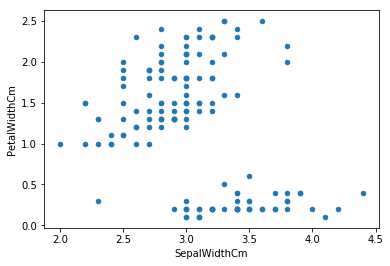

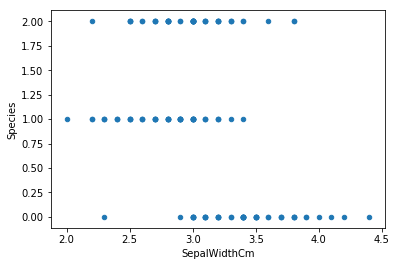

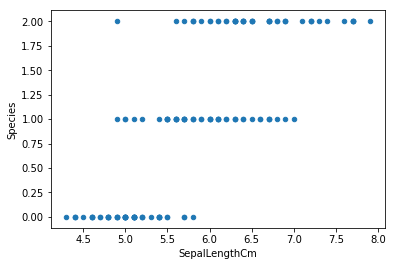

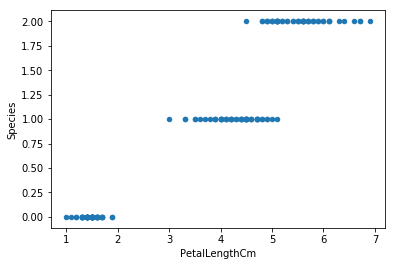

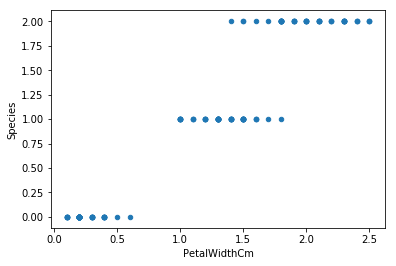

In [16]:
df.plot.scatter(x='SepalLengthCm', y='PetalWidthCm')
df.plot.scatter(x='SepalLengthCm', y='SepalWidthCm')
df.plot.scatter(x='PetalLengthCm', y='PetalWidthCm')
df.plot.scatter(x='PetalLengthCm', y='SepalWidthCm')
df.plot.scatter(x='SepalLengthCm', y='PetalLengthCm')
df.plot.scatter(x='SepalWidthCm', y='PetalWidthCm')
df.plot.scatter(x='SepalWidthCm', y='Species')
df.plot.scatter(x='SepalLengthCm', y='Species')
df.plot.scatter(x='PetalLengthCm', y='Species')
df.plot.scatter(x='PetalWidthCm', y='Species')

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [17]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Correlation among all variables and give your insights (1 Marks)

In [18]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


##### We can see that PetalLengthCm and PetalWidthCm are highly correlated. Hence we need to remove one of the features.

In [19]:
# Dropping PetalLengthCm feature
X = X.drop('PetalLengthCm', axis=1)

### Split data in Training and Validation in 80:20 (1 Marks)

In [20]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split

test_size = 0.20 # taking 80:20 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(120, 3)
(30, 3)


In [21]:
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalWidthCm
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2


### Do Feature Scaling ( 1 Marks)

In [22]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X['SepalLengthCm'] = std_scale.fit_transform(X[['SepalLengthCm']])
X['SepalWidthCm'] = std_scale.fit_transform(X[['SepalWidthCm']])
X['PetalWidthCm'] = std_scale.fit_transform(X[['PetalWidthCm']])
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalWidthCm
0,-0.900681,1.032057,-1.312977
1,-1.143017,-0.124958,-1.312977
2,-1.385353,0.337848,-1.312977


### Train and Fit NaiveBayes Model(2 Marks)

In [24]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None)


/home/stumble/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#Predict
# make predictions
expected = y_test
predicted = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [28]:
# show Confusion Matrix
# summarize the fit of the model
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

    avg / total       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


In [29]:
# show accuracy
model.score(X_test, y_test)

0.9333333333333333